# Amazon UK Product Data - Exploratory Data Analysis

This notebook provides a comprehensive exploratory data analysis of the Amazon UK product dataset, including data quality assessment, statistical analysis, and advanced visualizations.

## 1. Library Imports and Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from scipy import stats
from scipy.stats import chi2_contingency
import re
from collections import Counter
from wordcloud import WordCloud
import textwrap

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# Configure plotting settings
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set figure size defaults
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Libraries loaded successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries loaded successfully!
Pandas version: 2.3.3
NumPy version: 2.3.5


## 2. Data Loading and Initial Inspection

In [3]:
# Load the dataset
print(" Loading Amazon UK product data...")
df = pd.read_csv('amz_uk_processed_data.csv')

# Basic dataset information
print(f"\n✅ Dataset loaded successfully!")
print(f" Dataset shape: {df.shape}")
print(f" Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

 Loading Amazon UK product data...

✅ Dataset loaded successfully!
 Dataset shape: (2222742, 10)
 Memory usage: 1123.73 MB


In [4]:
# Display basic information about the dataset
print(" DATASET OVERVIEW")
print("=" * 50)
df.info()

 DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222742 entries, 0 to 2222741
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
 9   categoryName       object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 154.7+ MB


In [5]:
# Display first few rows
print("\n First 5 rows of the dataset:")
print("=" * 50)
display(df.head())


 First 5 rows of the dataset:


,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big vibrant sound Wi-Fi and Bluetooth smart speaker wi...",https://m.media-amazon.com/images/I/71C3lbbeLsL._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth Speaker with 15-Hour Playtime, 66-Foot Bluetooth ...",https://m.media-amazon.com/images/I/61c5rSxwP0L._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big vibrant sound Wi-Fi and Bluetooth smart speaker wi...",https://m.media-amazon.com/images/I/61j3SEUjMJL._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 release) | Bigger vibrant sound Wi-Fi and Bluetooth sm...",https://m.media-amazon.com/images/I/71yf6yTNWSL._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-Fi and Bluetooth smart speaker with Alexa | Charcoal,https://m.media-amazon.com/images/I/613dEoF9-rL._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [6]:
# Display last few rows
print("\n Last 5 rows of the dataset:")
print("=" * 50)
display(df.tail())


 Last 5 rows of the dataset:


,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
2222737,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling Armour, Youth Chest Protector, Body Chest Spine Pr...",https://m.media-amazon.com/images/I/61ycPU7k4kL._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B0CHSD7P2Q,0.0,0,22.34,False,0,Motorbike Clothing
2222738,B0B7B8FNBQ,"PROFIRST Waterproof Motorcycle 2 Piece Ladies Motorbike Suit Jacket, Trouser with Minder Boots f...",https://m.media-amazon.com/images/I/51gkh0iYT5L._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B0B7B8FNBQ,0.0,0,97.99,False,0,Motorbike Clothing
2222739,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevlar Jeans Pants Protective with CE Armour Biker Gea...,https://m.media-amazon.com/images/I/81gJgaMHg4L._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B0BD5FL5FB,0.0,0,52.99,False,0,Motorbike Clothing
2222740,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trousers - Cargo Jeans Pants Made With 280gsm Aramid Wit...,https://m.media-amazon.com/images/I/81KQ5askGGL._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B008OYLL4I,4.3,404,79.99,False,0,Motorbike Clothing
2222741,B08P3W9B3T,RIDEX CJ223 Motorcycle Motorbike Jacket Armoured Waterproof for Mens,https://m.media-amazon.com/images/I/61QaDygK8mL._AC_UL320_.jpg,https://www.amazon.co.uk/dp/B08P3W9B3T,4.5,34,53.99,False,0,Motorbike Clothing


In [7]:
# Column names and data types
print("\n COLUMN INFORMATION")
print("=" * 50)
column_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
display(column_info)


 COLUMN INFORMATION


,Column,Data Type,Non-Null Count,Null Count,Null Percentage
asin,asin,object,2222742,0,0.0
title,title,object,2222742,0,0.0
imgUrl,imgUrl,object,2222742,0,0.0
productURL,productURL,object,2222742,0,0.0
stars,stars,float64,2222742,0,0.0
reviews,reviews,int64,2222742,0,0.0
price,price,float64,2222742,0,0.0
isBestSeller,isBestSeller,bool,2222742,0,0.0
boughtInLastMonth,boughtInLastMonth,int64,2222742,0,0.0
categoryName,categoryName,object,2222742,0,0.0


## 3. Data Quality Assessment

In [9]:
# Comprehensive data quality report
def data_quality_report(df):
    """Generate a comprehensive data quality report"""
    print("DATA QUALITY ASSESSMENT")
    print("=" * 60)
    
    # Basic metrics
    total_cells = df.shape[0] * df.shape[1]
    missing_cells = df.isnull().sum().sum()
    duplicate_rows = df.duplicated().sum()
    
    print(f"Total records: {df.shape[0]:,}")
    print(f"Total columns: {df.shape[1]}")
    print(f"Total cells: {total_cells:,}")
    print(f"Missing cells: {missing_cells:,} ({missing_cells/total_cells*100:.2f}%)")
    print(f"Duplicate rows: {duplicate_rows:,} ({duplicate_rows/df.shape[0]*100:.2f}%)")
    
    # Memory usage
    memory_usage = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Memory usage: {memory_usage:.2f} MB")
    
    return {
        'total_records': df.shape[0],
        'total_columns': df.shape[1],
        'missing_percentage': missing_cells/total_cells*100,
        'duplicate_percentage': duplicate_rows/df.shape[0]*100,
        'memory_mb': memory_usage
    }

quality_metrics = data_quality_report(df)

DATA QUALITY ASSESSMENT
Total records: 2,222,742
Total columns: 10
Total cells: 22,227,420
Missing cells: 0 (0.00%)
Duplicate rows: 0 (0.00%)
Memory usage: 1138.05 MB


In [10]:
# Missing value analysis
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

if len(missing_data) > 0:
    print("\n MISSING VALUES ANALYSIS")
    print("=" * 40)
    
    # Create visualization for missing values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar plot of missing values
    missing_data.plot(kind='bar', ax=ax1, color='coral')
    ax1.set_title('Missing Values by Column', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Columns')
    ax1.set_ylabel('Number of Missing Values')
    ax1.tick_params(axis='x', rotation=45)
    
    # Percentage of missing values
    missing_percentages = (missing_data / len(df) * 100)
    missing_percentages.plot(kind='bar', ax=ax2, color='lightcoral')
    ax2.set_title('Missing Values Percentage by Column', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Columns')
    ax2.set_ylabel('Percentage of Missing Values')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Display missing value statistics
    missing_df = pd.DataFrame({
        'Column': missing_data.index,
        'Missing Count': missing_data.values,
        'Missing Percentage': (missing_data / len(df) * 100).round(2)
    })
    display(missing_df)
else:
    print("✅ No missing values found in the dataset!")

✅ No missing values found in the dataset!


## 4. Statistical Summary and Distribution Analysis

In [11]:
# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"🔢 Numeric columns ({len(numeric_columns)}): {numeric_columns}")
print(f"🏷️ Categorical columns ({len(categorical_columns)}): {categorical_columns}")

🔢 Numeric columns (4): ['stars', 'reviews', 'price', 'boughtInLastMonth']
🏷️ Categorical columns (5): ['asin', 'title', 'imgUrl', 'productURL', 'categoryName']


In [12]:
# Statistical summary for numeric columns
if len(numeric_columns) > 0:
    print("\n📊 STATISTICAL SUMMARY - NUMERIC COLUMNS")
    print("=" * 50)
    
    # Enhanced describe with additional statistics
    numeric_stats = df[numeric_columns].describe()
    
    # Add additional statistics
    additional_stats = pd.DataFrame({
        col: {
            'skewness': df[col].skew(),
            'kurtosis': df[col].kurtosis(),
            'cv': df[col].std() / df[col].mean() if df[col].mean() != 0 else np.nan,
            'iqr': df[col].quantile(0.75) - df[col].quantile(0.25)
        }
        for col in numeric_columns
    }).T
    
    # Combine statistics
    enhanced_stats = pd.concat([numeric_stats, additional_stats.T])
    display(enhanced_stats.round(4))
else:
    print("ℹ️ No numeric columns found in the dataset.")


📊 STATISTICAL SUMMARY - NUMERIC COLUMNS


,stars,reviews,price,boughtInLastMonth
count,2.222742e+06,2.222742e+06,2.222742e+06,2.222742e+06
mean,2.031900e+00,3.821617e+02,9.425740e+01,1.856900e+01
std,2.185500e+00,5.020752e+03,3.606225e+02,1.919030e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.990000e+01,0.000000e+00
75%,4.400000e+00,4.400000e+01,4.771000e+01,0.000000e+00
max,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04
skewness,1.879000e-01,1.374579e+02,2.653620e+01,5.327920e+01
kurtosis,-1.898200e+00,3.100934e+04,3.931824e+03,7.152358e+03



📈 DISTRIBUTION ANALYSIS - NUMERIC COLUMNS


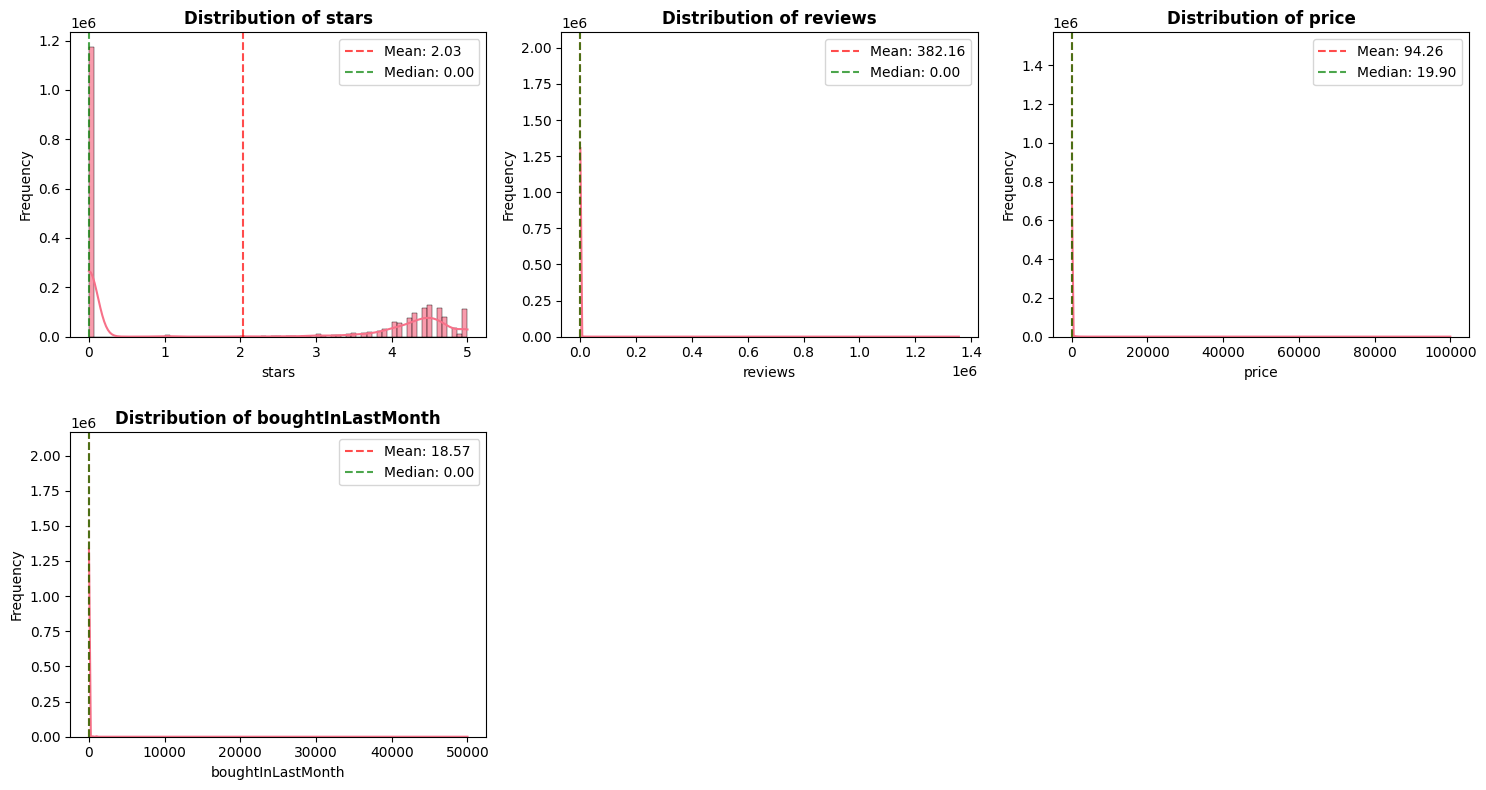

In [13]:
# Distribution analysis for numeric columns
if len(numeric_columns) > 0:
    print("\n📈 DISTRIBUTION ANALYSIS - NUMERIC COLUMNS")
    print("=" * 50)
    
    # Create subplots for distributions
    n_cols = min(3, len(numeric_columns))
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numeric_columns):
        if i < len(axes):
            ax = axes[i]
            
            # Handle potential inf or very large values
            data = df[col].replace([np.inf, -np.inf], np.nan).dropna()
            
            if len(data) > 0:
                # Create histogram with KDE
                sns.histplot(data=data, kde=True, ax=ax, alpha=0.7)
                ax.set_title(f'Distribution of {col}', fontweight='bold')
                ax.set_xlabel(col)
                ax.set_ylabel('Frequency')
                
                # Add statistical annotations
                mean_val = data.mean()
                median_val = data.median()
                ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
                ax.axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
                ax.legend()
            else:
                ax.text(0.5, 0.5, f'No valid data\nfor {col}', 
                       horizontalalignment='center', verticalalignment='center', 
                       transform=ax.transAxes)
    
    # Hide empty subplots
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

## 5. Categorical Data Analysis

In [14]:
# Categorical columns analysis
if len(categorical_columns) > 0:
    print("\n🏷️ CATEGORICAL DATA ANALYSIS")
    print("=" * 40)
    
    for col in categorical_columns:
        print(f"\n📊 Analysis for '{col}':")
        print("-" * 30)
        
        # Basic statistics
        unique_count = df[col].nunique()
        total_count = df[col].count()
        null_count = df[col].isnull().sum()
        
        print(f"Unique values: {unique_count}")
        print(f"Non-null count: {total_count}")
        print(f"Null count: {null_count}")
        
        # Value counts (top 10)
        if unique_count > 0:
            top_values = df[col].value_counts().head(10)
            print(f"\nTop {min(10, len(top_values))} values:")
            for val, count in top_values.items():
                percentage = (count / total_count) * 100
                print(f"  '{val}': {count} ({percentage:.2f}%)")
        
        print("\n" + "="*50)


🏷️ CATEGORICAL DATA ANALYSIS

📊 Analysis for 'asin':
------------------------------
Unique values: 2222742
Non-null count: 2222742
Null count: 0

Top 10 values:
  'B09B96TG33': 1 (0.00%)
  'B01HTH3C8S': 1 (0.00%)
  'B09B8YWXDF': 1 (0.00%)
  'B09B8T5VGV': 1 (0.00%)
  'B09WX6QD65': 1 (0.00%)
  'B09B97WSLF': 1 (0.00%)
  'B09B9615X2': 1 (0.00%)
  'B01MTB55WH': 1 (0.00%)
  'B016MO90GW': 1 (0.00%)
  'B09ZQF5GZW': 1 (0.00%)


📊 Analysis for 'title':
------------------------------
Unique values: 2073245
Non-null count: 2222742
Null count: 0

Top 10 values:
  'OYhmc Portable Pedal Exerc': 723 (0.03%)
  'ScibOr Outdoor Sleeveless Fishing Vest': 322 (0.01%)
  'Mens Breathable Lace-Up Football Shoes Non-Slip Outdoor Boys Junior Soccer Shoes Training Professional Boots Soccer Sneakers Athletics Training Shoes for Teenager': 144 (0.01%)
  'CMP Women's T-shirt': 129 (0.01%)
  'SHOPPRO Kids Golf Shoes Set, White, with Shoes Bag, UV Sun Protection Arm Sleeves, Golf Pro Cap and Instant Cooling Towel, O

In [15]:
# Visualize categorical data distributions
if len(categorical_columns) > 0:
    print("\n📊 CATEGORICAL DATA VISUALIZATION")
    print("=" * 40)
    
    # Select columns with reasonable number of unique values for visualization
    viz_columns = [col for col in categorical_columns if df[col].nunique() <= 20 and df[col].nunique() > 1]
    
    if len(viz_columns) > 0:
        n_cols = min(2, len(viz_columns))
        n_rows = (len(viz_columns) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
        if n_rows == 1 and n_cols == 1:
            axes = [axes]
        elif n_rows == 1 or n_cols == 1:
            axes = axes.flatten()
        else:
            axes = axes.flatten()
        
        for i, col in enumerate(viz_columns):
            if i < len(axes):
                ax = axes[i]
                
                # Create bar plot
                top_10 = df[col].value_counts().head(10)
                top_10.plot(kind='bar', ax=ax, color='skyblue', alpha=0.8)
                ax.set_title(f'Distribution of {col}', fontweight='bold')
                ax.set_xlabel(col)
                ax.set_ylabel('Count')
                ax.tick_params(axis='x', rotation=45)
        
        # Hide empty subplots
        for j in range(len(viz_columns), len(axes)):
            axes[j].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    else:
        print("ℹ️ No categorical columns suitable for visualization (too many unique values or all the same).")


📊 CATEGORICAL DATA VISUALIZATION
ℹ️ No categorical columns suitable for visualization (too many unique values or all the same).


## 6. Correlation Analysis


🔗 CORRELATION ANALYSIS


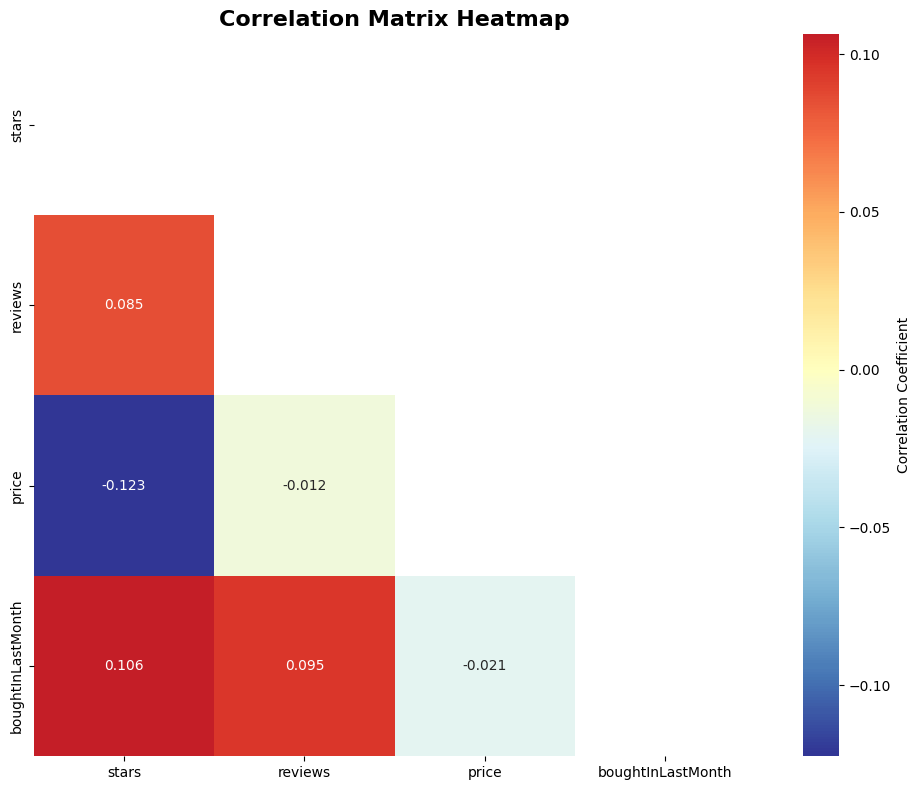


🔍 Strong Correlations (|r| > 0.5):
----------------------------------------
No strong correlations found.


In [16]:
# Correlation analysis for numeric variables
if len(numeric_columns) > 1:
    print("\n🔗 CORRELATION ANALYSIS")
    print("=" * 30)
    
    # Calculate correlation matrix
    correlation_matrix = df[numeric_columns].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdYlBu_r', 
                center=0,
                square=True,
                fmt='.3f',
                cbar_kws={'label': 'Correlation Coefficient'})
    plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Find strong correlations
    print("\n🔍 Strong Correlations (|r| > 0.5):")
    print("-" * 40)
    
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                strong_corr.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': corr_val
                })
    
    if strong_corr:
        strong_corr_df = pd.DataFrame(strong_corr)
        strong_corr_df = strong_corr_df.sort_values('Correlation', key=abs, ascending=False)
        display(strong_corr_df)
    else:
        print("No strong correlations found.")
        
else:
    print("ℹ️ Cannot perform correlation analysis: Less than 2 numeric columns found.")

## 7. Outlier Detection and Analysis

In [17]:
# Outlier detection using IQR method
if len(numeric_columns) > 0:
    print("\n🎯 OUTLIER DETECTION ANALYSIS")
    print("=" * 35)
    
    outlier_summary = {}
    
    for col in numeric_columns:
        # Calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        outlier_summary[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
        
        print(f"\n📊 Outliers in '{col}':")
        print(f"  Count: {len(outliers)} ({(len(outliers) / len(df)) * 100:.2f}%)")
        print(f"  Lower bound: {lower_bound:.2f}")
        print(f"  Upper bound: {upper_bound:.2f}")
    
    # Create outlier summary DataFrame
    outlier_df = pd.DataFrame(outlier_summary).T
    print("\n📋 Outlier Summary:")
    display(outlier_df.round(2))


🎯 OUTLIER DETECTION ANALYSIS

📊 Outliers in 'stars':
  Count: 0 (0.00%)
  Lower bound: -6.60
  Upper bound: 11.00

📊 Outliers in 'reviews':
  Count: 414741 (18.66%)
  Lower bound: -66.00
  Upper bound: 110.00

📊 Outliers in 'price':
  Count: 304095 (13.68%)
  Lower bound: -46.56
  Upper bound: 104.28

📊 Outliers in 'boughtInLastMonth':
  Count: 161315 (7.26%)
  Lower bound: 0.00
  Upper bound: 0.00

📋 Outlier Summary:


,count,percentage,lower_bound,upper_bound
stars,0.0,0.00,-6.60,11.00
reviews,414741.0,18.66,-66.00,110.00
price,304095.0,13.68,-46.56,104.28
boughtInLastMonth,161315.0,7.26,0.00,0.00



📦 BOX PLOTS FOR OUTLIER VISUALIZATION


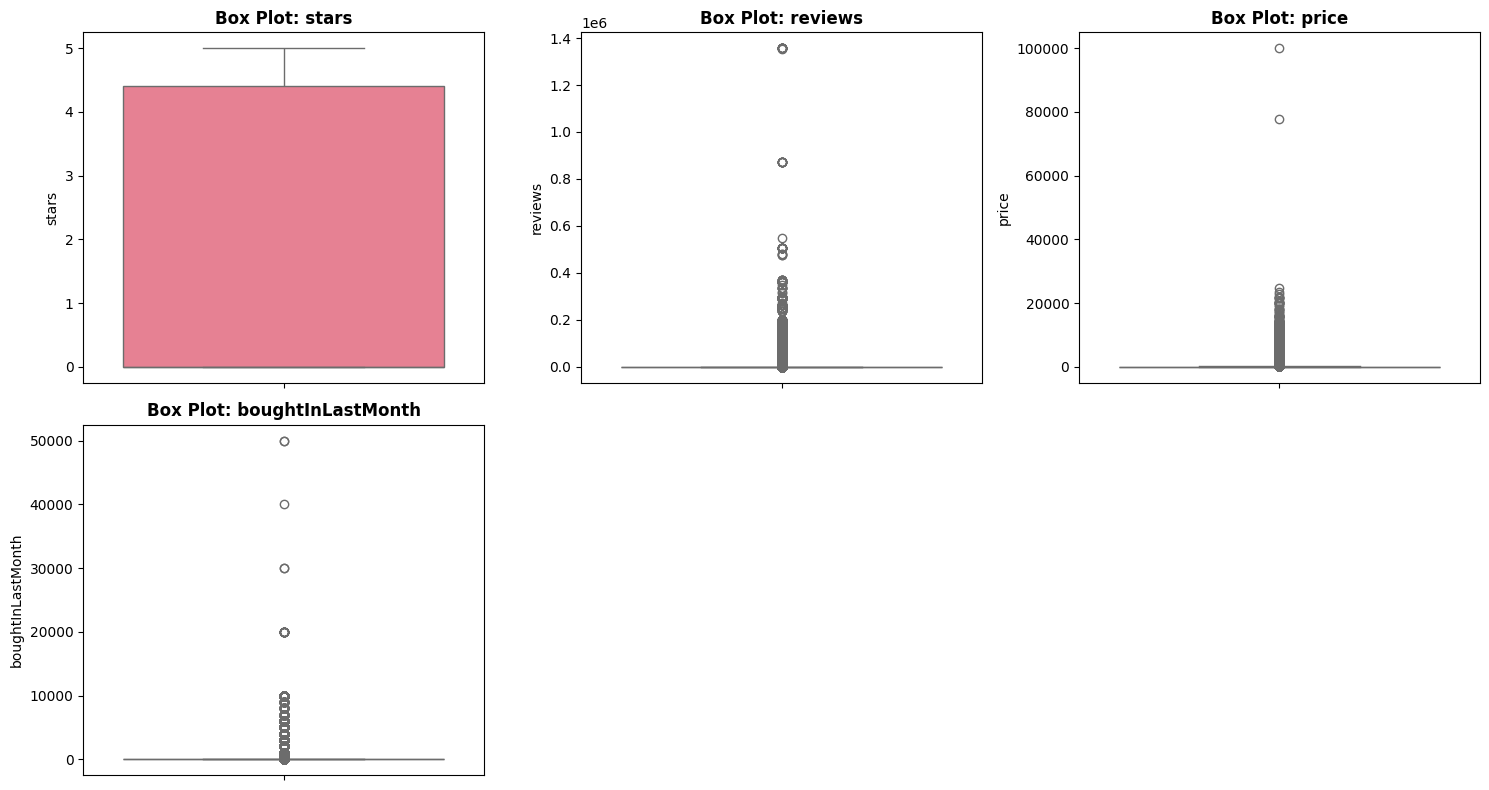

In [18]:
# Box plots for outlier visualization
if len(numeric_columns) > 0:
    print("\n📦 BOX PLOTS FOR OUTLIER VISUALIZATION")
    print("=" * 40)
    
    n_cols = min(3, len(numeric_columns))
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numeric_columns):
        if i < len(axes):
            ax = axes[i]
            
            # Handle potential inf values
            data = df[col].replace([np.inf, -np.inf], np.nan).dropna()
            
            if len(data) > 0:
                sns.boxplot(y=data, ax=ax)
                ax.set_title(f'Box Plot: {col}', fontweight='bold')
                ax.set_ylabel(col)
            else:
                ax.text(0.5, 0.5, f'No valid data\nfor {col}', 
                       horizontalalignment='center', verticalalignment='center', 
                       transform=ax.transAxes)
    
    # Hide empty subplots
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

## 8. Advanced Analysis and Insights

In [19]:
# Data type optimization suggestions
print("\n⚡ DATA TYPE OPTIMIZATION SUGGESTIONS")
print("=" * 45)

optimization_suggestions = []

for col in df.columns:
    current_dtype = str(df[col].dtype)
    
    if current_dtype == 'object':
        # Check if it's actually numeric
        try:
            pd.to_numeric(df[col], errors='raise')
            optimization_suggestions.append({
                'Column': col,
                'Current Type': current_dtype,
                'Suggested Type': 'numeric',
                'Reason': 'Contains numeric values stored as text'
            })
        except:
            # Check if it could be categorical
            unique_ratio = df[col].nunique() / len(df)
            if unique_ratio < 0.5:  # Less than 50% unique values
                optimization_suggestions.append({
                    'Column': col,
                    'Current Type': current_dtype,
                    'Suggested Type': 'category',
                    'Reason': f'Low cardinality ({df[col].nunique()} unique values)'
                })
    
    elif current_dtype in ['int64', 'float64']:
        # Check if we can downcast
        min_val = df[col].min()
        max_val = df[col].max()
        
        if current_dtype == 'int64':
            if min_val >= 0 and max_val <= 255:
                optimization_suggestions.append({
                    'Column': col,
                    'Current Type': current_dtype,
                    'Suggested Type': 'uint8',
                    'Reason': 'Values fit in smaller integer type'
                })
            elif min_val >= -128 and max_val <= 127:
                optimization_suggestions.append({
                    'Column': col,
                    'Current Type': current_dtype,
                    'Suggested Type': 'int8',
                    'Reason': 'Values fit in smaller integer type'
                })

if optimization_suggestions:
    opt_df = pd.DataFrame(optimization_suggestions)
    display(opt_df)
else:
    print("✅ Data types appear to be well optimized!")


⚡ DATA TYPE OPTIMIZATION SUGGESTIONS


,Column,Current Type,Suggested Type,Reason
0,categoryName,object,category,Low cardinality (296 unique values)


In [20]:
# Cardinality analysis
print("\n🔢 CARDINALITY ANALYSIS")
print("=" * 30)

cardinality_info = []
for col in df.columns:
    unique_count = df[col].nunique()
    total_count = len(df)
    cardinality_ratio = unique_count / total_count
    
    if cardinality_ratio == 1.0:
        cardinality_type = "Unique Identifier"
    elif cardinality_ratio > 0.95:
        cardinality_type = "High Cardinality"
    elif cardinality_ratio > 0.5:
        cardinality_type = "Medium Cardinality"
    else:
        cardinality_type = "Low Cardinality"
    
    cardinality_info.append({
        'Column': col,
        'Unique Values': unique_count,
        'Total Values': total_count,
        'Cardinality Ratio': cardinality_ratio,
        'Type': cardinality_type
    })

cardinality_df = pd.DataFrame(cardinality_info)
cardinality_df = cardinality_df.sort_values('Cardinality Ratio', ascending=False)
display(cardinality_df.round(4))


🔢 CARDINALITY ANALYSIS


,Column,Unique Values,Total Values,Cardinality Ratio,Type
0,asin,2222742,2222742,1.0000,Unique Identifier
3,productURL,2222742,2222742,1.0000,Unique Identifier
1,title,2073245,2222742,0.9327,Medium Cardinality
2,imgUrl,1770232,2222742,0.7964,Medium Cardinality
6,price,82687,2222742,0.0372,Low Cardinality
5,reviews,17216,2222742,0.0077,Low Cardinality
9,categoryName,296,2222742,0.0001,Low Cardinality
4,stars,42,2222742,0.0000,Low Cardinality
8,boughtInLastMonth,25,2222742,0.0000,Low Cardinality
7,isBestSeller,2,2222742,0.0000,Low Cardinality


## 9. Data Quality Recommendations

In [21]:
# Generate data quality recommendations
print("\n💡 DATA QUALITY RECOMMENDATIONS")
print("=" * 40)

recommendations = []

# Missing value recommendations
missing_data = df.isnull().sum()
high_missing = missing_data[missing_data > len(df) * 0.1]  # More than 10% missing

if len(high_missing) > 0:
    recommendations.append({
        'Category': 'Missing Values',
        'Priority': 'High',
        'Issue': f"Columns with >10% missing values: {', '.join(high_missing.index)}",
        'Recommendation': 'Consider imputation strategies or removing these columns if not critical'
    })

# Duplicate recommendations
duplicates = df.duplicated().sum()
if duplicates > 0:
    recommendations.append({
        'Category': 'Duplicates',
        'Priority': 'Medium',
        'Issue': f"{duplicates} duplicate rows found ({duplicates/len(df)*100:.2f}%)",
        'Recommendation': 'Review and remove duplicates if they are not intentional'
    })

# Outlier recommendations
if len(numeric_columns) > 0:
    high_outlier_cols = []
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
        if len(outliers) > len(df) * 0.05:  # More than 5% outliers
            high_outlier_cols.append(col)
    
    if high_outlier_cols:
        recommendations.append({
            'Category': 'Outliers',
            'Priority': 'Medium',
            'Issue': f"Columns with >5% outliers: {', '.join(high_outlier_cols)}",
            'Recommendation': 'Investigate outliers - they may be data errors or valid extreme values'
        })

# Data type recommendations
if len(optimization_suggestions) > 0:
    recommendations.append({
        'Category': 'Data Types',
        'Priority': 'Low',
        'Issue': f"{len(optimization_suggestions)} columns could benefit from type optimization",
        'Recommendation': 'Optimize data types to reduce memory usage and improve performance'
    })

# Display recommendations
if recommendations:
    rec_df = pd.DataFrame(recommendations)
    
    # Sort by priority
    priority_order = {'High': 3, 'Medium': 2, 'Low': 1}
    rec_df['Priority_Num'] = rec_df['Priority'].map(priority_order)
    rec_df = rec_df.sort_values('Priority_Num', ascending=False).drop('Priority_Num', axis=1)
    
    for idx, row in rec_df.iterrows():
        priority_icon = "🔴" if row['Priority'] == 'High' else "🟡" if row['Priority'] == 'Medium' else "🟢"
        print(f"{priority_icon} {row['Priority']} Priority - {row['Category']}:")
        print(f"  Issue: {row['Issue']}")
        print(f"  Recommendation: {row['Recommendation']}")
        print()
else:
    print("✅ No major data quality issues identified!")


💡 DATA QUALITY RECOMMENDATIONS
🟡 Medium Priority - Outliers:
  Issue: Columns with >5% outliers: reviews, price, boughtInLastMonth
  Recommendation: Investigate outliers - they may be data errors or valid extreme values

🟢 Low Priority - Data Types:
  Issue: 1 columns could benefit from type optimization
  Recommendation: Optimize data types to reduce memory usage and improve performance



## 10. Summary and Key Insights

In [23]:
# Generate comprehensive summary
print("\n📊 COMPREHENSIVE DATA ANALYSIS SUMMARY")
print("=" * 50)

print(f"\n🔍 Dataset Overview:")
print(f"  • Total Records: {df.shape[0]:,}")
print(f"  • Total Columns: {df.shape[1]}")
print(f"  • Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"  • Missing Data: {df.isnull().sum().sum():,} cells ({df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100:.2f}%)")
print(f"  • Duplicate Rows: {df.duplicated().sum():,} ({df.duplicated().sum()/df.shape[0]*100:.2f}%)")

print(f"\n📊 Column Types:")
print(f"  • Numeric Columns: {len(numeric_columns)}")
print(f"  • Categorical Columns: {len(categorical_columns)}")

if len(numeric_columns) > 0:
    print(f"\n🔢 Numeric Data Insights:")
    for col in numeric_columns:
        col_data = df[col].replace([np.inf, -np.inf], np.nan).dropna()
        if len(col_data) > 0:
            skewness = col_data.skew()
            skew_interpretation = "highly skewed" if abs(skewness) > 1 else "moderately skewed" if abs(skewness) > 0.5 else "approximately normal"
            print(f"  • {col}: Range [{col_data.min():.2f}, {col_data.max():.2f}], {skew_interpretation}")

if len(categorical_columns) > 0:
    print(f"\n🏷️ Categorical Data Insights:")
    for col in categorical_columns:
        unique_count = df[col].nunique()
        if unique_count > 0:
            most_common = df[col].mode().iloc[0] if len(df[col].mode()) > 0 else "N/A"
            print(f"  • {col}: {unique_count} unique values, most common: '{most_common}'")

print(f"\n🎯 Key Findings:")
findings = []

# Data completeness
completeness = (1 - df.isnull().sum().sum()/(df.shape[0]*df.shape[1])) * 100
if completeness > 95:
    findings.append(f"✅ Excellent data completeness ({completeness:.1f}%)")
elif completeness > 85:
    findings.append(f"✅ Good data completeness ({completeness:.1f}%)")
else:
    findings.append(f"⚠️ Data completeness could be improved ({completeness:.1f}%)")

# Duplicates
duplicate_pct = df.duplicated().sum()/df.shape[0]*100
if duplicate_pct == 0:
    findings.append("✅ No duplicate records found")
elif duplicate_pct < 5:
    findings.append(f"⚠️ Low level of duplicates ({duplicate_pct:.1f}%)")
else:
    findings.append(f"🔴 High level of duplicates ({duplicate_pct:.1f}%) - needs attention")

# Data diversity
if len(categorical_columns) > 0:
    avg_cardinality = np.mean([df[col].nunique()/len(df) for col in categorical_columns])
    if avg_cardinality > 0.8:
        findings.append("📊 High data diversity in categorical variables")
    elif avg_cardinality > 0.3:
        findings.append("📊 Moderate data diversity in categorical variables")
    else:
        findings.append("📊 Low data diversity in categorical variables")

for finding in findings:
    print(f"  {finding}")

print(f"\n Analysis completed successfully! Dataset is ready for further modeling and analysis.")


📊 COMPREHENSIVE DATA ANALYSIS SUMMARY

🔍 Dataset Overview:
  • Total Records: 2,222,742
  • Total Columns: 10
  • Memory Usage: 1138.05 MB
  • Missing Data: 0 cells (0.00%)
  • Duplicate Rows: 0 (0.00%)

📊 Column Types:
  • Numeric Columns: 4
  • Categorical Columns: 5

🔢 Numeric Data Insights:
  • stars: Range [0.00, 5.00], approximately normal
  • reviews: Range [0.00, 1356658.00], highly skewed
  • price: Range [0.00, 100000.00], highly skewed
  • boughtInLastMonth: Range [0.00, 50000.00], highly skewed

🏷️ Categorical Data Insights:
  • asin: 2222742 unique values, most common: '0000060259'
  • title: 2073245 unique values, most common: 'OYhmc Portable Pedal Exerc'
  • imgUrl: 1770232 unique values, most common: 'https://m.media-amazon.com/images/I/614tIPGtglL._AC_UL320_.jpg'
  • productURL: 2222742 unique values, most common: 'https://www.amazon.co.uk/dp/0000060259'
  • categoryName: 296 unique values, most common: 'Sports & Outdoors'

🎯 Key Findings:
  ✅ Excellent data completen